In [1]:
!git clone https://github.com/ouaguenouni/Eunomia
!pip install -r Eunomia/requirements.txt

Cloning into 'Eunomia'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 91 (delta 45), reused 66 (delta 20), pack-reused 0
Receiving objects: 100% (91/91), 28.66 KiB | 481.00 KiB/s, done.
Resolving deltas: 100% (45/45), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 732.8/732.8 kB 8.3 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from Eunomia.preferences import *
from Eunomia.additive_functions import *
from Eunomia.alternatives import *
from Eunomia.sampling import *
from Eunomia.mcmc import *
from Eunomia.degree import *
from Eunomia.experiments import *
pyro.set_rng_seed(1)

In [ ]:
alt_df = pd.read_csv("Eunomia/data/alternatives0.csv")
alternatives = alt_df.values
r_df = pd.read_csv("Eunomia/data/rank0.csv")
ranks = r_df.columns.values

In [8]:
n = alternatives.shape[0]
theta = generate_additive_theta(alternatives.shape[0],2)
preferences = PreferenceModel(alternatives, ranks)
data = preferences.generate_preference_matrix(theta)
data = torch.tensor(data).float()
data[0:2]

tensor([[ 0.,  0.,  0.,  0.,  1., -1., -1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  0.,  0.,  0., -1., -1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [9]:
model = posterior_sampling_model(data, sigma_w = 1e-1, sigma_p = 10)
weights, sigmas = sample_model(model, data , "w", "sigma", warmup_steps = 200, num_samples = 800)


Sample: 100%|██████████| 1000/1000 [07:41,  2.17it/s, step size=2.59e-02, acc. prob=0.885]


In [10]:
sv = compute_semivalues(n, theta, weights.numpy().mean(axis = 0), lambda x:1)

In [11]:
sv.argsort()

array([6, 9, 2, 4, 7, 8, 5, 3, 0, 1])

(array([  1.,   4.,  12.,   0.,  41.,  67.,   0., 135., 222., 318.]),
 array([0.84444445, 0.86000001, 0.87555557, 0.89111114, 0.9066667 ,
        0.92222226, 0.93777776, 0.95333332, 0.96888888, 0.98444444,
        1.        ]),
 <BarContainer object of 10 artists>)

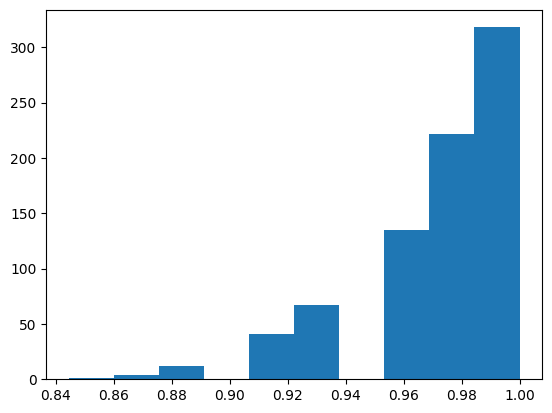

In [12]:
accs2 = get_acc_distribution(data, weights, sigmas)
plt.hist(accs2)

In [3]:
n = 5
m = 2**(n-2)

theta = generate_additive_theta(n,1)
tw = generate_normal_weights(theta, 10)
alternatives = generate_random_alternatives_matrix(m,n)
ranks = compute_ws_ranks(alternatives, theta, tw)
ranks

array([  2.53651216, -10.72968622,  -7.35732745,  10.1258895 ,
         2.76856205,   0.23204989,  -0.60379672,  -2.74520537])

In [5]:
t_sv = compute_semivalues(n, theta, tw, lambda x:1)
t_sv

array([ 259.89525819,  -97.88102618,  -84.50748036, -171.67497954,
        138.46522069])

In [6]:
theta = generate_additive_theta(n,2)
preferences = PreferenceModel(alternatives, ranks)
data = preferences.generate_preference_matrix(theta)
data = torch.tensor(data).float()
data[0:5]

tensor([[-1.,  0.,  0.,  0.,  1., -1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
          0.],
        [-1.,  0., -1., -1.,  0., -1., -1., -1., -1., -1., -1.,  0., -1., -1.,
         -1.],
        [ 0., -1.,  0.,  1., -1.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,
          0.],
        [ 0.,  0., -1.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1.,
         -1.],
        [-1., -1.,  0.,  1.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.]])

In [7]:
model = posterior_sampling_model(data, sigma_w = 1e-1, sigma_p = 1)
sampled_weights, sigmas = sample_model(model, data , "w", "sigma", warmup_steps = 200, num_samples = 500)

Sample: 100%|██████████| 700/700 [01:58,  5.89it/s, step size=7.48e-02, acc. prob=0.874]


(array([  1.,   1.,   1.,   2.,   4.,   4.,  57.,  71.,  95., 264.]),
 array([0.53571427, 0.58214283, 0.62857139, 0.67500001, 0.72142857,
        0.76785713, 0.8142857 , 0.86071426, 0.90714288, 0.95357144,
        1.        ]),
 <BarContainer object of 10 artists>)

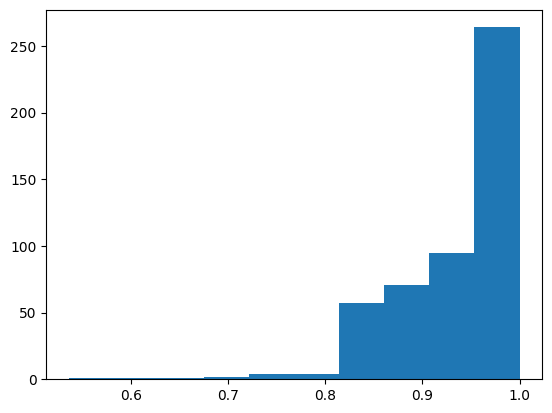

In [8]:
accs2 = get_acc_distribution(data, sampled_weights, sigmas)
plt.hist(accs2)

In [9]:
predicted_rankings = [np.argsort(compute_semivalues(n, theta, weights, lambda x:1))[::-1] for weights in sampled_weights]

(array([ 30., 144.,  28.,   0.,  10., 127.,   0., 112.,  45.,   4.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

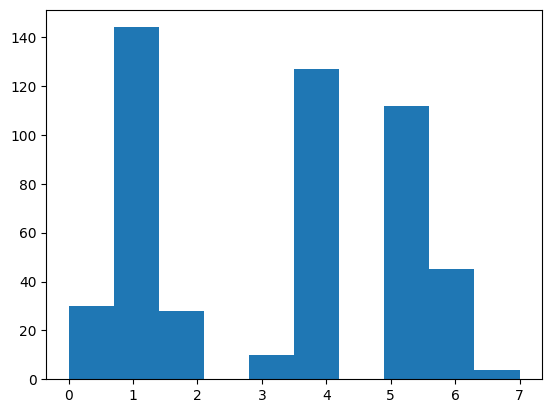

In [10]:
kts = get_kt_distribution(predicted_rankings, np.argsort(t_sv))
plt.hist(kts)

In [22]:
import time

TEST_NAME = "T2330"
REPLACE = False

n_vals = [4,5,6,7,8,9,10]
sigma_weights = 10
sigma_w_vals = [1, 1e-1, 1e-2]
sigma_p_vals = [1, 1e-1, 1e-2]
n_samples = 1000


for n in n_vals:
  for k in range(1,n-1):
    for m in list(2**i for i in range(2,n)):
      for sigma_w in sigma_w_vals:
        for sigma_p in sigma_p_vals:

          run_d = {
              "n":n,
              "k":k,
              "m":m,
              "sigma_w":sigma_w,
              "sigma_p":sigma_p,
              "n_samples" : n_samples
          }

          found = find_experiment_file(run_d, TEST_NAME)

          if found:
            date = found
            print(f"Found file: {file_name}")

            if REPLACE:
              print('Replacing it...')
            else:
              continue
          else:
            file_name = compute_experiment_file_name(run_d, TEST_NAME)
            print("Registering the results in : ",file_name)


          theta = generate_additive_theta(n,k)
          weights = generate_normal_weights(theta, sigma_weights)
          alternatives = generate_random_alternatives_matrix(m,n)
          ranks = compute_ws_ranks(alternatives, theta, weights)
          t_sv = compute_semivalues(n, theta, weights, lambda x:1)
          preferences = PreferenceModel(alternatives, ranks)
          data = preferences.generate_preference_matrix(theta)
          data = torch.tensor(data).float()
          t = time.time()
          model = posterior_sampling_model(data, sigma_w = sigma_w, sigma_p = sigma_p)
          diag, sampled_weights, sigmas = sample_model(model, data , "w", "sigma", warmup_steps = 200, num_samples = n_samples, return_diag = True)
          t = time.time() - t
          accs_d = get_acc_distribution(data, sampled_weights, sigmas)

          predicted_rankings = [np.argsort(compute_semivalues(n, theta, weights, lambda x:1))[::-1] for weights in sampled_weights]
          kt_d = get_kt_distribution(predicted_rankings, np.argsort(t_sv))

          file_path = record_experiment_results(run_d, TEST_NAME)
          run_d["time"] = t
          run_d["weights"] = weights.tolist()
          run_d["predicted_rankings"] = [i.tolist() for i in predicted_rankings]
          run_d["accuracy_distribution"] = [i.tolist() for i in accs_d]
          run_d["kt_d"] = [i.tolist() for i in kt_d]
          run_d["diag"] = dict(diag)
          print("diag: ", diag)
          with open(file_path, 'w') as file:
            yaml.dump(run_d, file, default_flow_style=False)


Registering the results in :  T2330/2023-11-18/n-4_k-1_m-4_sigma_w-1_sigma_p-1_n_samples-1000.yaml


Sample: 100%|██████████| 1200/1200 [00:28, 42.80it/s, step size=5.62e-01, acc. prob=0.739]


diag:  {'sigma': OrderedDict([('n_eff', tensor(489.1721)), ('r_hat', tensor(0.9993))]), 'w': OrderedDict([('n_eff', tensor([371.2941, 685.6437, 231.5420, 741.3631])), ('r_hat', tensor([1.0057, 1.0113, 1.0065, 0.9990]))]), 'divergences': {'chain 0': [24, 25, 29, 32, 46, 126, 140, 229, 234, 237, 238, 309, 314, 339, 341, 343, 344, 345, 347, 348, 349, 350, 351, 354, 400, 401, 581, 600, 643, 644, 650, 669, 673, 682, 685, 773, 781, 784, 790, 877, 948, 972]}, 'acceptance rate': {'chain 0': 0.926}}
Registering the results in :  T2330/2023-11-18/n-4_k-1_m-4_sigma_w-0.1_sigma_p-1_n_samples-1000.yaml


Sample: 100%|██████████| 1200/1200 [00:37, 32.09it/s, step size=3.47e-01, acc. prob=0.896]


diag:  {'sigma': OrderedDict([('n_eff', tensor(474.8499)), ('r_hat', tensor(1.0008))]), 'w': OrderedDict([('n_eff', tensor([598.9387, 732.0312, 628.4086, 667.9917])), ('r_hat', tensor([1.0024, 0.9993, 0.9990, 0.9991]))]), 'divergences': {'chain 0': [869, 872, 924, 946]}, 'acceptance rate': {'chain 0': 0.978}}
Registering the results in :  T2330/2023-11-18/n-4_k-1_m-4_sigma_w-0.01_sigma_p-1_n_samples-1000.yaml


Sample:  51%|█████     | 613/1200 [00:23, 55.42it/s, step size=5.53e-01, acc. prob=0.896]

KeyboardInterrupt: ignored